In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [4]:
y_a = cdf[['CO2EMISSIONS']]
x = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
print(x.shape,y_a.shape)

(1067, 3) (1067, 1)


In [5]:
#Normalization
y_a = y_a/y_a.max()
x = x/x.max()

In [6]:
y_a = np.array(y_a)
x = np.array(x)
y_a = y_a.T 


In [7]:
p = list(range(1,4))
p = np.array(p)
p = np.reshape(3,1)

In [8]:
def curve(m,x,c):
    return np.dot(m,x.T**p)+c
def error(m,x,c,y):
    return np.mean((curve(m,x,c)-y)**2)
def der_slope(m,x,c,y):
    return 2*np.mean(np.multiply((curve(m,x,c)),x.T**p),axis=1)
def der_int(m,x,c,y):
    return 2*np.mean(curve(m,x,c)-y)

Initial error: 0.04850902300863544
Final reduced error: 0.01883465769392233


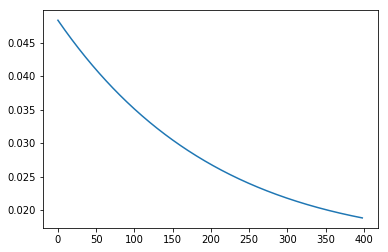

In [9]:
m = np.random.randn(1,3)
c = np.random.randn(1)
m_copy = m
c_copy = c
lr = 0.001
cost=[]
iterations = 400
for i in range(1,iterations):
    m = m - lr*der_slope(m,x,c,y_a)
    c = c - lr*der_int(m,x,c,y_a)
    cost.append(error(m,x,c,y_a))
    clear_output(True)
print("Initial error:",error(m_copy,x,c_copy,y_a))    
print("Final reduced error:",error(m,x,c,y_a))
plt.plot(cost)

NameError: name 'test_x' is not defined